In [8]:
# Import all Math tools:
#-----------------------
import numpy as np
from scipy import integrate
from scipy.spatial.distance import directed_hausdorff
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy
# Figure dpi
dpi = 72

import timeit

import sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

## Experiment 2: Bifurcation Diagram of GP fit

### Function Definitions

In [2]:
def f_bif(x,r0):
    return r0*x*(1-x)

def plot_bifurcation_f(r1,r2,fig,ax1):
    n = 2000
    r0 = np.linspace(r1, r2, n)
    iterations = 5000
    last = 500
    x = 1e-5 * np.ones(n)

    for i in range(iterations):
        x = f_bif(x,r0)
        # We display the bifurcation diagram.
        if i >= (iterations - last):
            ax1.plot(r0, x, ',k', alpha=.25, lw=1)
    ax1.set_xlim(r1, r2)
    ax1.set_xlabel("r"), ax1.set_ylabel("x")
    ax1.set_title("Bifurcation diagram of f")
    ax1.minorticks_on()

In [3]:
def GP_Predict_Array(X,m):
    Xstar = np.linspace(X,X, 1).reshape(-1, 1)
    Ystar, Vstar = m.predict(Xstar)
    return Ystar

def plot_bifurcation_GP(r1,r2,N,fig,ax1):
    Xnew = np.linspace(-0.05, 1.05, 100)[:, None]
    X = np.linspace(0, 1, N)[:,None] # Sample points
    
    n = 2000
    iterations = 5000
    last = 500
    x = 1e-5 * np.ones(n)
    for r_i in np.linspace(r1, r2, n):
        # -- Recalculate GP fit: -- 
        k = GPy.kern.RBF(1,variance=1.,lengthscale=0.1,name="rbf")
        f = lambda x: r_i*x*(1-x)
        sd = 0
        ep = np.random.normal(0., sd, (N,1))
        Y = f(X) + ep
        m = GPy.models.GPRegression(X, Y, k)
        m.constrain_positive(warning=False)
        m.Gaussian_noise.variance = sd**2
        m.Gaussian_noise.variance.fix()
        m.optimize()
        mean, Cov = m.predict_noiseless(Xnew, full_cov=True)
        # -------------------------
        # Plot diagram:
        for i in range(iterations):
            x = GP_Predict_Array(x,m)
            # We display the bifurcation diagram.
            if i >= (iterations - last):
                ax1.plot(r_i * np.ones(n), x, ',k', alpha=.25, lw=1)
        update_progress(r_i/r2)
    ax1.set_xlim(r1, r2)
    ax1.set_xlabel("r"), ax1.set_ylabel("x")
    ax1.set_title("Bifurcation diagram of GP Fit")
    ax1.minorticks_on()

    
# -- Predicted Computation Time -- 
start_time = timeit.default_timer()

n = 2000
iterations = 5000
last = 500
x = 1e-5 * np.ones(n)
Xnew = np.linspace(-0.05, 1.05, 100)[:, None]
X = np.linspace(0, 1, 10)[:,None] # Sample points
k = GPy.kern.RBF(1,variance=1.,lengthscale=0.1,name="rbf")
f = lambda x: 4*x*(1-x)
sd = 0
ep = np.random.normal(0., sd, (10,1))
Y = f(X) + ep
m = GPy.models.GPRegression(X, Y, k)
m.constrain_positive(warning=False)
m.Gaussian_noise.variance = sd**2
m.Gaussian_noise.variance.fix()
m.optimize()
mean, Cov = m.predict_noiseless(Xnew, full_cov=True)
for i in range(iterations):
    x = GP_Predict_Array(x,m)

elapsed = timeit.default_timer() - start_time
multiplier = n
print(str(multiplier) + " x " + str(elapsed) + " seconds.")
elapsed = elapsed * multiplier
print("Approximate calculation time needed: " + str(elapsed) + " seconds = " + str(elapsed/60) + " minutes = " + str(elapsed/3600) + " hours.")
print("Approximate calculation time needed: " + str(np.floor(elapsed/3600)) + " hrs, " + str(np.floor((elapsed/3600-np.floor(elapsed/3600))*60)) + " min, " + str(((elapsed/3600-np.floor(elapsed/3600))*60 - np.floor((elapsed/3600-np.floor(elapsed/3600))*60))*60) + " sec.")

2000 x 4.450835999999981 seconds.
Approximate calculation time needed: 8901.671999999962 seconds = 148.36119999999937 minutes = 2.472686666666656 hours.
Approximate calculation time needed: 2.0 hrs, 28.0 min, 21.671999999961855 sec.


### Results

Bifurcation Diagram of $f$

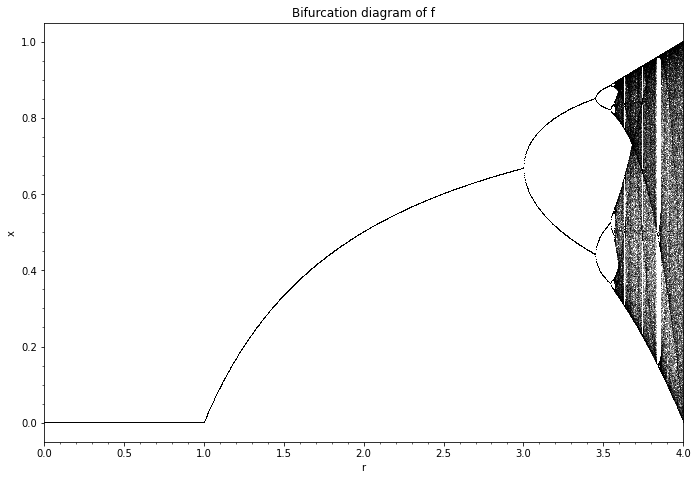

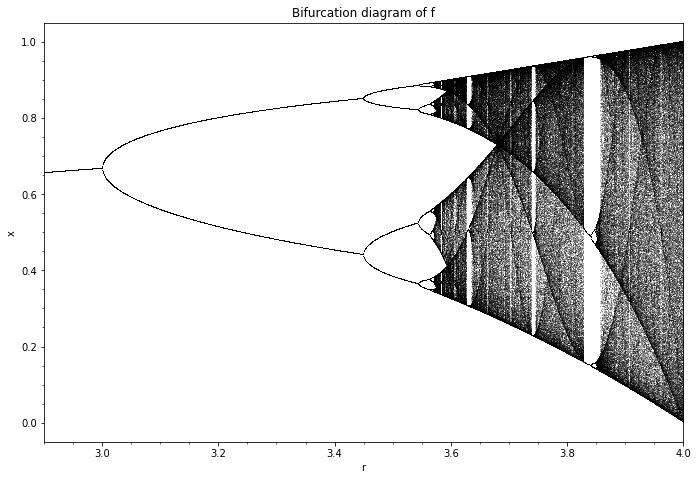

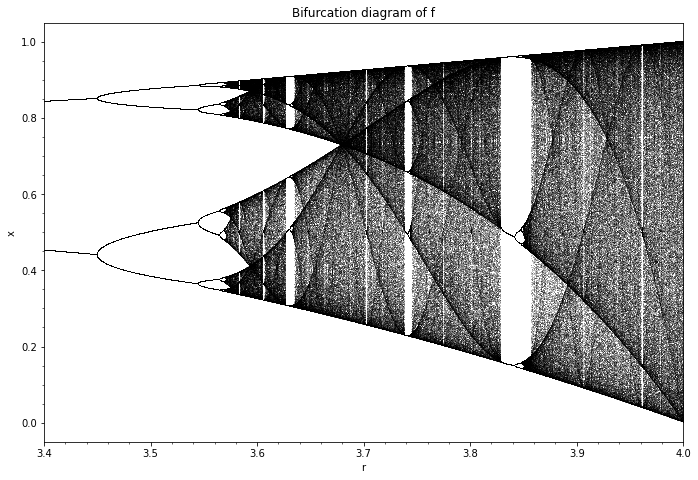

In [6]:
fig = plt.figure(figsize=(0.7*0.5*dpi,0.7*0.15*dpi),dpi=dpi)
ax1 = fig.add_subplot(121)
plot_bifurcation_f(0,4,fig,ax1)

fig = plt.figure(figsize=(0.7*0.5*dpi,0.7*0.15*dpi),dpi=dpi)
ax1 = fig.add_subplot(121)
plot_bifurcation_f(2.9,4,fig,ax1)

fig = plt.figure(figsize=(0.7*0.5*dpi,0.7*0.15*dpi),dpi=dpi)
ax1 = fig.add_subplot(121)
plot_bifurcation_f(3.4,4,fig,ax1)

Bifurcation Diagram of GP fit for uniformly distributed initial sample points

In [ ]:
fig = plt.figure(figsize=(0.7*0.5*dpi,0.7*0.15*dpi),dpi=dpi)
ax1 = fig.add_subplot(121)
plot_bifurcation_GP(0,4,10,fig,ax1)

Progress: [#######-------------] 36.6%


In [ ]:
fig = plt.figure(figsize=(0.7*0.5*dpi,0.7*0.15*dpi),dpi=dpi)
ax1 = fig.add_subplot(121)
plot_bifurcation_GP(2.9,4,10,fig,ax1)

In [ ]:
fig = plt.figure(figsize=(0.7*0.5*dpi,0.7*0.15*dpi),dpi=dpi)
ax1 = fig.add_subplot(121)
plot_bifurcation_GP(3.4,4,10,fig,ax1)